In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 直方图计算函数
def GetHist(img):
    img = img.flatten()
    img = img.tolist()
    hist = []
    for i in range(0, 256):
        hist.append(img.count(i))
    return hist

## 5.4 频域滤波

### 5.4.1 低通滤波器

#### 第一步：把待滤波的图像读进来

In [18]:
img = cv2.imread('./png_files/fft1.png', 0)

#### 第二步：进行数据类型转换

In [19]:
img_float = np.float32(img)

#### 第三步：使用cv2.dft进行傅里叶变化，并使用np.fft.fftshift将低频转移到图像中心

In [20]:
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_center = np.fft.fftshift(dft)

#### 第四步：定义掩模：生成的掩模中间为1周围为0

In [39]:
R = 30    # 截止频率
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if ((x - crow) ** 2 + (y - ccol) ** 2) ** 0.5 <= R:
            mask[y, x] = 1

那么我们刚刚定义的掩膜，它在频域看起来就长这个样子：

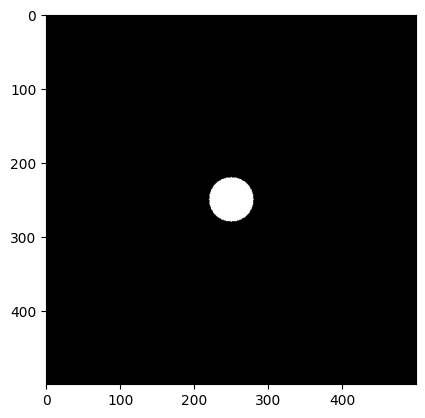

In [40]:
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
plt.figure()
plt.imshow(show_mask[:,:,0], cmap='gray')
plt.show()

#### 第五步：将掩模与傅里叶变化后的图像（dft_center）相乘，保留低频部分

In [41]:
mask_img = dft_center * mask

#### 第六步：使用np.fft.ifftshift(将低频移动到原来的位置

In [42]:
img_idf = np.fft.ifftshift(mask_img)

#### 第七步：使用cv2.idft进行傅里叶的反变化

In [43]:
img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

#### 第八步：画图，对比

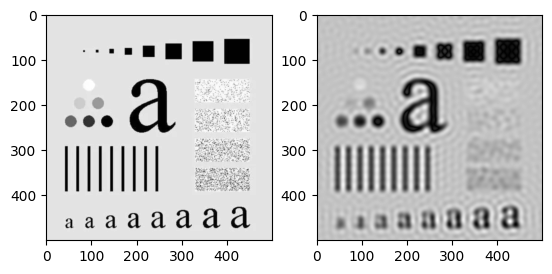

In [44]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_idf, cmap='gray')
plt.show()

### 5.4.2 ButterWorth滤波器

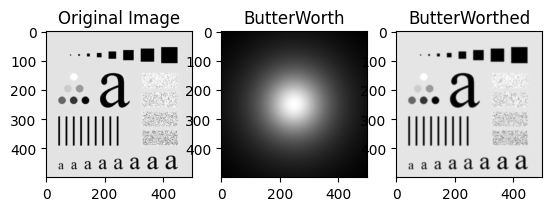

In [12]:
img = cv2.imread('./png_files/fft1.png', 0)

img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_center = np.fft.fftshift(dft)

# 巴特沃斯滤波器
D0 = 100
n = 1
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.float32)
for u in range(img.shape[0]):
    for v in range(img.shape[1]):
        mask[u, v] = 1 / ( 1 + (((v - crow) ** 2 + (u - ccol) ** 2)**0.5 / D0)**(2*n) )   # 巴特沃斯的公式
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
show_mask = show_mask[:,:,0]   # 稍后用以显示巴特沃斯的频域图像

mask_img = dft_center * mask

img_idf = np.fft.ifftshift(mask_img)

img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

plt.figure()

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('ButterWorth')
plt.imshow(show_mask, cmap='gray')

plt.subplot(133)
plt.title('ButterWorthed')
plt.imshow(img_idf, cmap='gray')

plt.show()

### 5.4.3 高斯低通滤波器

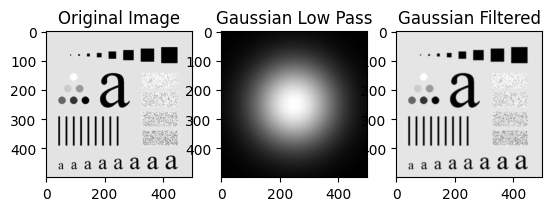

In [13]:
img = cv2.imread('./png_files/fft1.png', 0)

img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_center = np.fft.fftshift(dft)

# 高斯低通滤波器
sigma = 100
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.float32)
for u in range(img.shape[0]):
    for v in range(img.shape[1]):
        mask[u, v] = np.exp( -((v - crow) ** 2 + (u - ccol) ** 2) / (2*sigma**2) )  # 高斯低通的公式
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
show_mask = show_mask[:,:,0]   # 稍后用以显示高斯低通的频域图像

mask_img = dft_center * mask

img_idf = np.fft.ifftshift(mask_img)

img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

plt.figure()

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Gaussian Low Pass')
plt.imshow(show_mask, cmap='gray')

plt.subplot(133)
plt.title('Gaussian Filtered')
plt.imshow(img_idf, cmap='gray')

plt.show()

### 5.4.4 高通滤波器

#### 5.4.4.1 理想高通滤波器

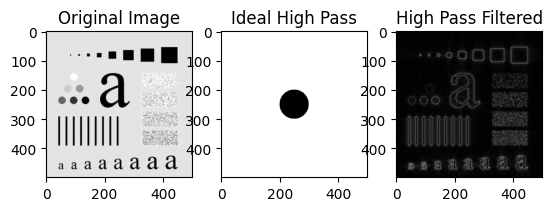

In [16]:
img = cv2.imread('./png_files/fft1.png', 0)

img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_center = np.fft.fftshift(dft)

# 理想高通滤波器
R = 50
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.float32)
for u in range(img.shape[0]):
    for v in range(img.shape[1]):
        if ((v - crow) ** 2 + (u - ccol) ** 2) ** 0.5 > R:
            mask[u, v] = 1
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
show_mask = show_mask[:,:,0]   # 稍后用以显示理想高通滤波器的频域图像

mask_img = dft_center * mask

img_idf = np.fft.ifftshift(mask_img)

img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

plt.figure()

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Ideal High Pass')
plt.imshow(show_mask, cmap='gray')

plt.subplot(133)
plt.title('High Pass Filtered')
plt.imshow(img_idf, cmap='gray')

plt.show()

#### 5.4.4.2 ButterWorth高通滤波器

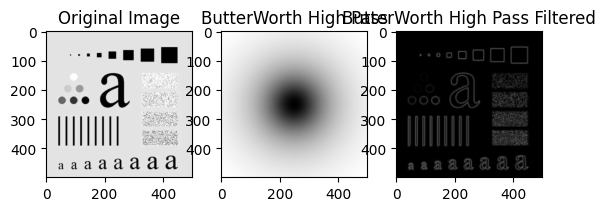

In [18]:
img = cv2.imread('./png_files/fft1.png', 0)

img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_center = np.fft.fftshift(dft)

# 巴特沃斯高通滤波器
D0 = 100
n = 1
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.float32)
for u in range(img.shape[0]):
    for v in range(img.shape[1]):
        if u == ccol and v == crow:
            continue
        mask[u, v] = 1 / ( 1 + (D0 / (((v - crow) ** 2 + (u - ccol) ** 2)**0.5))**(2*n) )   # 巴特沃斯高通滤波器的公式
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
show_mask = show_mask[:,:,0]   # 稍后用以显示巴特沃斯高通滤波器的频域图像

mask_img = dft_center * mask

img_idf = np.fft.ifftshift(mask_img)

img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

plt.figure()

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('ButterWorth High Pass')
plt.imshow(show_mask, cmap='gray')

plt.subplot(133)
plt.title('ButterWorth High Pass Filtered')
plt.imshow(img_idf, cmap='gray')

plt.show()

#### 5.4.4.3 高斯高通滤波器

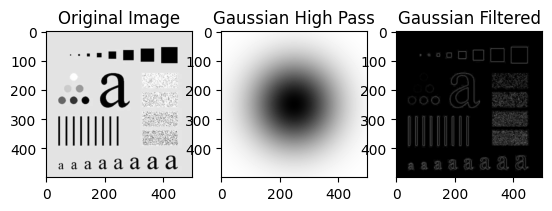

In [19]:
img = cv2.imread('./png_files/fft1.png', 0)

img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_center = np.fft.fftshift(dft)

# 高斯高通滤波器
sigma = 100
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.float32)
for u in range(img.shape[0]):
    for v in range(img.shape[1]):
        mask[u, v] = 1 - np.exp( -((v - crow) ** 2 + (u - ccol) ** 2) / (2*sigma**2) )  # 高斯高通滤波器的公式
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
show_mask = show_mask[:,:,0]   # 稍后用以显示高斯高通滤波器的频域图像

mask_img = dft_center * mask

img_idf = np.fft.ifftshift(mask_img)

img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

plt.figure()

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Gaussian High Pass')
plt.imshow(show_mask, cmap='gray')

plt.subplot(133)
plt.title('Gaussian Filtered')
plt.imshow(img_idf, cmap='gray')

plt.show()